In [48]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv('mishnah.csv')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083 entries, 0 to 4082
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   4083 non-null   int64 
 1   tractate     4083 non-null   object
 2   chapter      4083 non-null   int64 
 3   mishnah      4083 non-null   int64 
 4   text         4083 non-null   object
 5   seder        4083 non-null   object
 6   tannaim      4083 non-null   object
 7   tanna_count  4083 non-null   int64 
 8   spacy_doc    4083 non-null   object
 9   tokens       4083 non-null   object
dtypes: int64(4), object(6)
memory usage: 319.1+ KB


In [207]:
tannaim = ['Shimon of Teman','Shimon the Reighteous','Antigonus a man of Socho','Yose ben Yoezer','Yose ben Yohanan',
          'Yehoshua ben Perahiah','Nittai the Arbelite','Yehuda ben Tabbai','Shimon ben Shetah','Shemaiah and Avtalion',
          'Hillel','Shammai','Gamliel the Elder','Shimon ben Gamliel','Yohanan ben Zakkai','Eliezer ben Hyrcanus',
          'Akiva','Shimon ben Gamliel','Meir','Yehuda','Akavia ben Mahalalel','Bava ben Buti','Ben He He',
          'Dosa ben Harkinas','Rabbi Hanina the vice-chief of the priests','Hanina ben Dosa','Zadok','Yehudah ben Batera',
          'Elazar ben Arach','Elazar ben Tzadok','Eliezer','Eliezer ben Yaakov','Nehunia ben Hakkanah','Shmuel Hakatan',
          'Tarfon','Yehoshua','Yose the priest','Abba Shaul','Elazar ben Azaria','Elazar of Modiin','Elisha ben Abuyah','Halafta',
          'Hanania ben Hakinai','Hanania ben Teradion','Ilai','Shimon ben Assai','Shimon ben Nannas','Shimon ben Zoma',
          'Yehuda ben Baba','Yehuda ben Batera','Ishmael','Yohanan ben Beroka','Yohanan ben Nuri','Yose ben Kisma',
          'Yose the Galilean','Elazar','Elazar ben Zadok','Hanina ben Gamliel','Meir','Natan','Rabbi Nehemia',
          'Shimon','Yehoshua ben Korha','Yohanan Hasandlar','Yonatan','Yose','Pinchas ben Yair','Shimon ben Elazar',
          'Shimon ben Halafta','Shimon ben Menasya','Shimon ben Yehuda','Yose ben Meshullam','Yose ben Yehuda',
          'Shimon ben Yehuda']
seder = []
tractate = []
tanna = []
index = []
for m,mishnah in enumerate(df.tannaim):
    if mishnah=='[]':
        tanna.append('')
        index.append(int(m))
        seder.append(str(df.iloc[m,5]))
        tractate.append(str(df.iloc[m,1]))
    else:
        mishnah=mishnah.replace('[','')
        mishnah=mishnah.replace(']','')
        mishnah=mishnah.replace('\'','')
        mishnah=mishnah.split(',')
        for x in range(0,len(mishnah)):
            mishnah[x] = mishnah[x].strip()
        for r,rabbi in enumerate(tannaim):
            if rabbi in mishnah:
                tanna.append(rabbi)
                index.append(int(m))
                seder.append(str(df.iloc[m,5]))
                tractate.append(str(df.iloc[m,1]))
    
mentions = pd.DataFrame(np.array([index,seder,tractate,tanna]).T)
mentions.columns = ['mishnah','seder','tractate','rabbi']
mentions["mishnah"] = pd.to_numeric(mentions["mishnah"])

In [208]:
mentions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5786 entries, 0 to 5785
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   mishnah   5786 non-null   int64 
 1   seder     5786 non-null   object
 2   tractate  5786 non-null   object
 3   rabbi     5786 non-null   object
dtypes: int64(1), object(3)
memory usage: 180.9+ KB


Text(0.5, 1.0, 'Distribution of Rabbis')

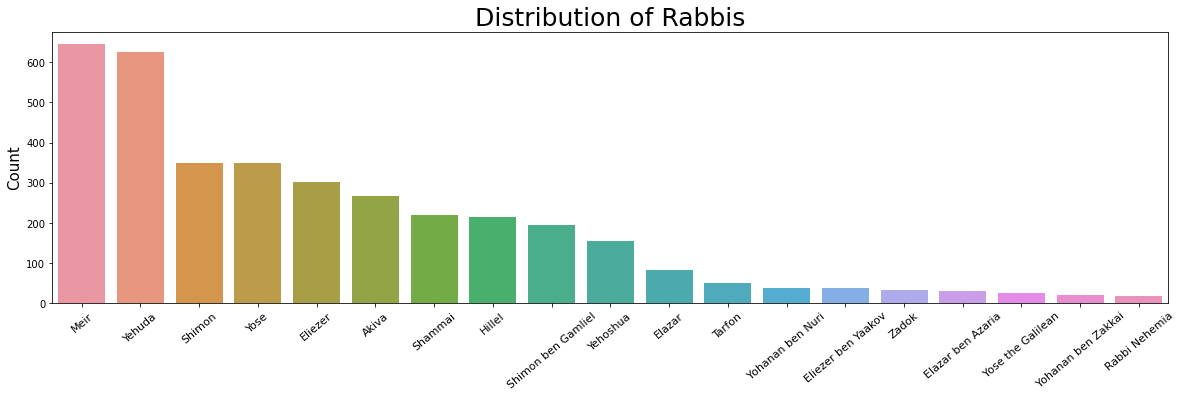

In [259]:
plt.figure(figsize=(20,5))
counts = mentions.rabbi.value_counts()
sns.barplot(x=counts.index[1:20],y=counts[1:20])
plt.xticks(rotation=40,fontsize=11)
plt.ylabel('Count',fontsize=15)
plt.title('Distribution of Rabbis',fontsize=25)

In [236]:
top_10 = ['Meir','Yehuda','Shimon','Yose','Eliezer','Akiva','Shammai','Hillel','Shimon ben Gamliel',
          'Yehoshua','Elazar','Tarfon','Yohanan ben Nuri','Eliezer ben Yaakov','Zadok']

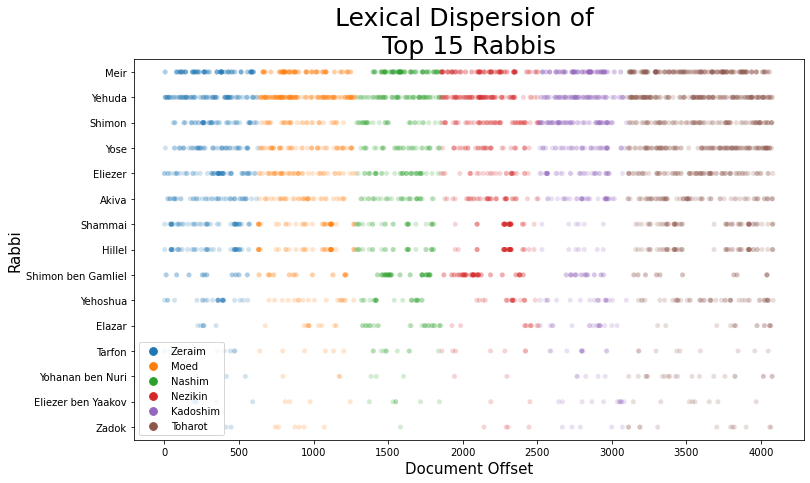

In [264]:
plt.figure(figsize=(12,7))
sns.stripplot(x ='mishnah',y='rabbi',hue='seder',data = mentions,alpha=0.2,order=top_10,jitter=0)
plt.xlabel('Document Offset',fontsize=15)
plt.ylabel('Rabbi',fontsize=15)
plt.title('Lexical Dispersion of \nTop 15 Rabbis',fontsize=25)
plt.legend()